# MUSHROOM CLASSIFICATION - PART I

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading, Exploring, Preprocessing Dataset

In [3]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.shape

(8124, 23)

In [6]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* We have 22 features and 1 target.
* We have 8124 rows and no null/missing values.
* All columns have values of the object datatype, i.e., all are categorical features.

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [9]:
for col in data.columns:
    print(col,"-")
    print("Number of Unique values:",len(data[col].unique()))
    print("Unique values:",data[col].unique())
    print()

class -
Number of Unique values: 2
Unique values: ['p' 'e']

cap-shape -
Number of Unique values: 6
Unique values: ['x' 'b' 's' 'f' 'k' 'c']

cap-surface -
Number of Unique values: 4
Unique values: ['s' 'y' 'f' 'g']

cap-color -
Number of Unique values: 10
Unique values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises -
Number of Unique values: 2
Unique values: ['t' 'f']

odor -
Number of Unique values: 9
Unique values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment -
Number of Unique values: 2
Unique values: ['f' 'a']

gill-spacing -
Number of Unique values: 2
Unique values: ['c' 'w']

gill-size -
Number of Unique values: 2
Unique values: ['n' 'b']

gill-color -
Number of Unique values: 12
Unique values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape -
Number of Unique values: 2
Unique values: ['e' 't']

stalk-root -
Number of Unique values: 5
Unique values: ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring -
Number of Unique values: 4
Unique values: ['s' 'f' 

* From observation we know that the column "veil-type" has the same value for all records, which means it'll not be helpful in classification. So, we can drop that column.
* We can also see that the column 'stalk-root' has a value '?' which is a missing-value. So, we will handle this column.

In [10]:
data.drop(columns=['veil-type'], inplace=True)

In [11]:
data.replace({'?':np.nan}, inplace=True)
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

* Since there are more than 2000 rows, removing that many rows will not be a good idea, so instead we will remove the 'stalk-root' column.

In [12]:
data.drop(columns=['stalk-root'], inplace=True)

* We will plot a heatmap to visualize the correlation of all the features with the target. This will give us some idea about the relevance of each feature with respect to the target.
* Then, we will fit a Random Forest Classifier on this dataset first to see which features are most important.
* We can then proceed with cutting down the dataset to the top _p_ features alone and fitting Random Forest and other classifiers to it.
* We can also apply PCA on the dataset and fit classifiers to data with only the top _q_ principle components that explain most of the variance in the dataset.
* But before doing any of that we will have to convert all these categorical columns into numerical.

In [13]:
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


* All the column values are converted to numerical form. LabelEncoder ensures that the values are encoded in lexical order.

In [14]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


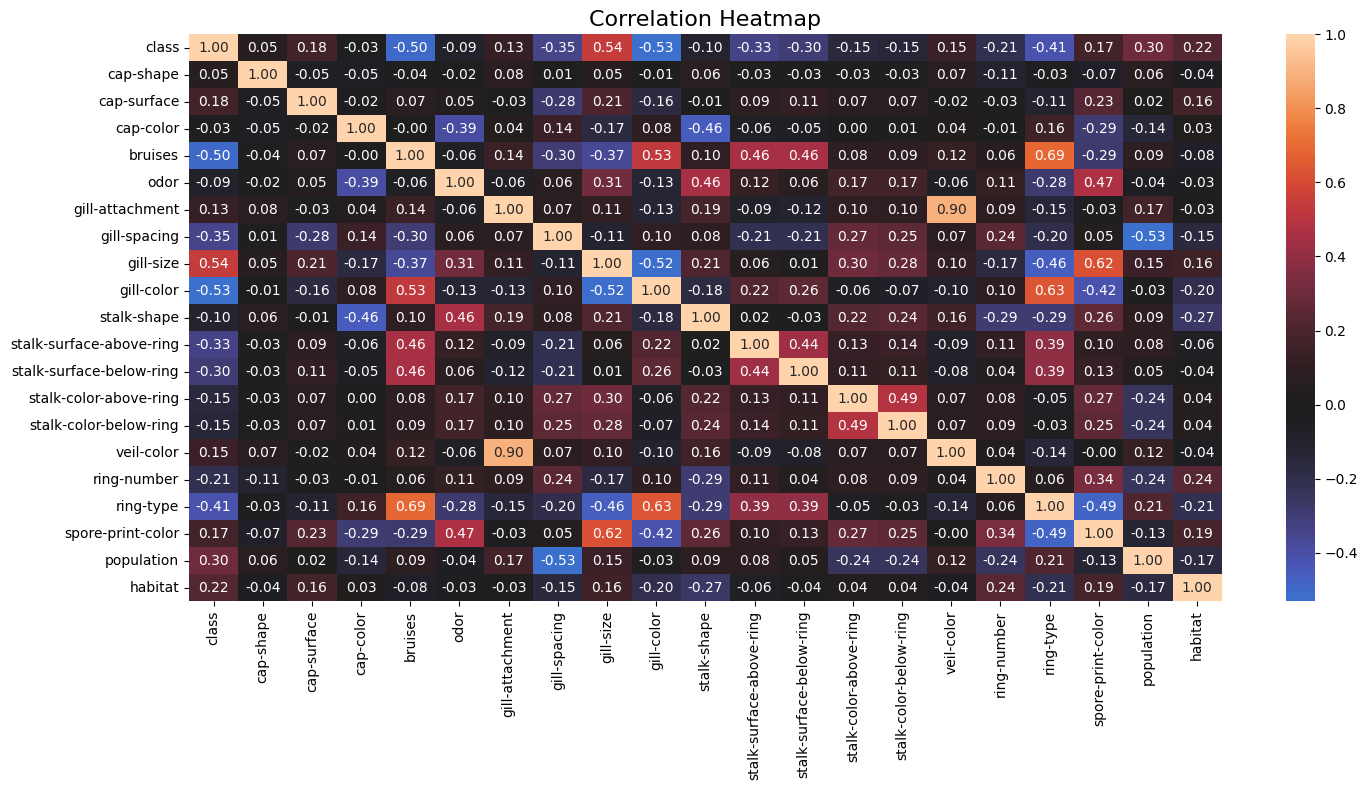

In [15]:
plt.figure(figsize=(15,8))
correlation = data.corr(method='pearson')
sns.heatmap(correlation, annot=True, fmt='.2f', center=0.0)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
# plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

* From the heatmap we can see that 'bruises', 'gill-size', gill-color', and 'ring-type' are the features that are most correlated with the target, where all except 'gill-size' are negatively correlated.
* These features are 'gill-spacing', 'stalk-surface-above-ring', 'stalk-surface-below-ring', and 'population', where all except 'population' are negatively correlated.
* So, based on correlation with the target, the above are the top 8 features, among which 'bruises', 'gill-size', and 'gill-color' are the top 3.

In [16]:
X = data.iloc[:,1:]
y = data.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

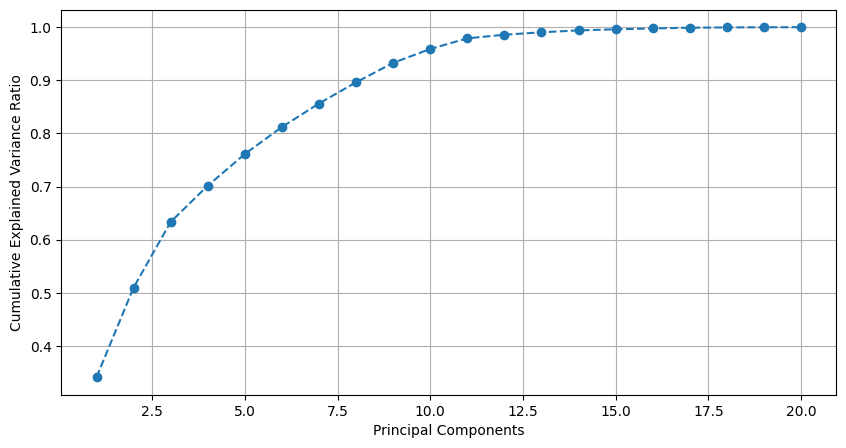

In [17]:
full_pca = PCA().fit(X)
cumulative_vars = np.cumsum(full_pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.plot(range(1,len(cumulative_vars)+1), cumulative_vars, marker='o', linestyle='dashed')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
# plt.savefig("PCA_explained_var.png", dpi=300)
plt.show()

* The first 3 principle components explain more than 60% of the variance, first 4 explain 70%, first 6 explain more than 80%, first 8 explain nearly 90%, and first 14 explain almost 100%.

## Feature Selection

### All Features

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
feat_imp1 = pd.DataFrame(data={'feature': X.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)
display(feat_imp1)

,feature,importance
4,odor,0.173919
7,gill-size,0.146850
17,spore-print-color,0.111369
8,gill-color,0.105918
16,ring-type,0.077265
18,population,0.061955
10,stalk-surface-above-ring,0.055616
3,bruises,0.046928
11,stalk-surface-below-ring,0.041642
6,gill-spacing,0.039109


* Based on feature-importances obtained from the fitted RandomForestClassifier, 'odor' which was one of the least correlated features with target, is the most important in its classification.
* 'gill-size' and 'gill-color' which were the next most correlated are within the top 4 based on feature importance as well.
* 'bruises' which was one of the most correlated with class, is only the 8th important feature based on the fitted model.
* The rest of the features that made in the top 8 with respect to correlation values are slightly less important according to the model, but still among the top 11.

In [20]:
rf_pred = rf.predict(X_test)
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rf_pred))

Accuracy of Random Forest Classifier: 1.0


In [21]:
print("Performance Metrics for Random Forest Classifier-\n")
print(classification_report(y_test, rf_pred))

Performance Metrics for Random Forest Classifier-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### Hyperparameter Tuning

In [22]:
rf = RandomForestClassifier(max_features='sqrt', random_state=42)
param_grid = {
    'n_estimators':[10,50,100,200,300,400,500,750,900,1000],
    'max_depth':[1,2,3,5,7,10,20,25,50,100]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
best_rf = gs.best_estimator_

{'max_depth': 10, 'n_estimators': 10}


In [23]:
print("Accuracy:",accuracy_score(y_test, best_rf.predict(X_test)))
print(classification_report(y_test, best_rf.predict(X_test)))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
feat_imp2 = pd.DataFrame({'feature':X.columns, 'importance':best_rf.feature_importances_}).sort_values(by='importance', ascending=False)
display(feat_imp2)

,feature,importance
4,odor,0.299705
7,gill-size,0.154159
8,gill-color,0.140350
17,spore-print-color,0.088949
18,population,0.049912
10,stalk-surface-above-ring,0.045746
3,bruises,0.043066
11,stalk-surface-below-ring,0.036257
19,habitat,0.028595
6,gill-spacing,0.028435


* The feature importances obtained now are slightly different than before but they're still not completely consistent with the correlation values.

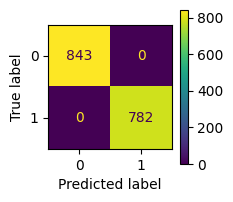

In [25]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rf.predict(X_test), ax=ax)
plt.show()

* We will apply Random Forest Classifier on the few features that are considered most important by different measures, and see which set of top features are most representative of the entire feature-space.

### Top Features based on Feature Importance

#### Feature Importances from Initial Random Forest Classifier

In [26]:
for i in range(1,21):
    top_cols = feat_imp1['feature'][:i].values
    X_most_imp = X[top_cols]
    X_train_i, X_test_i, _, _ = train_test_split(X_most_imp, y, test_size=0.2, random_state=42)
    rf_i = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
    rf_i.fit(X_train_i, y_train)
    rf_i_pred = rf_i.predict(X_test_i)
    acc = accuracy_score(y_test, rf_i_pred)
    print(f"Accuracy of Random Forest with top {i} features:",acc)

Accuracy of Random Forest with top 1 features: 0.9846153846153847
Accuracy of Random Forest with top 2 features: 0.9846153846153847
Accuracy of Random Forest with top 3 features: 0.9926153846153846
Accuracy of Random Forest with top 4 features: 0.9932307692307693
Accuracy of Random Forest with top 5 features: 0.9938461538461538
Accuracy of Random Forest with top 6 features: 0.9944615384615385
Accuracy of Random Forest with top 7 features: 1.0
Accuracy of Random Forest with top 8 features: 1.0
Accuracy of Random Forest with top 9 features: 1.0
Accuracy of Random Forest with top 10 features: 1.0
Accuracy of Random Forest with top 11 features: 1.0
Accuracy of Random Forest with top 12 features: 1.0
Accuracy of Random Forest with top 13 features: 1.0
Accuracy of Random Forest with top 14 features: 1.0
Accuracy of Random Forest with top 15 features: 1.0
Accuracy of Random Forest with top 16 features: 1.0
Accuracy of Random Forest with top 17 features: 1.0
Accuracy of Random Forest with top 

#### Feature Importances from Random Forest Classifier after Hyperparameter Tuning

In [27]:
for i in range(1,21):
    top_cols = feat_imp2['feature'][:i].values
    X_most_imp = X[top_cols]
    X_train_i, X_test_i, _, _ = train_test_split(X_most_imp, y, test_size=0.2, random_state=42)
    rf_i = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
    rf_i.fit(X_train_i, y_train)
    rf_i_pred = rf_i.predict(X_test_i)
    acc = accuracy_score(y_test, rf_i_pred)
    print(f"Accuracy of Random Forest with top {i} features:",acc)

Accuracy of Random Forest with top 1 features: 0.9846153846153847
Accuracy of Random Forest with top 2 features: 0.9846153846153847
Accuracy of Random Forest with top 3 features: 0.9883076923076923
Accuracy of Random Forest with top 4 features: 0.9932307692307693
Accuracy of Random Forest with top 5 features: 0.9944615384615385
Accuracy of Random Forest with top 6 features: 1.0
Accuracy of Random Forest with top 7 features: 1.0
Accuracy of Random Forest with top 8 features: 1.0
Accuracy of Random Forest with top 9 features: 1.0
Accuracy of Random Forest with top 10 features: 1.0
Accuracy of Random Forest with top 11 features: 1.0
Accuracy of Random Forest with top 12 features: 1.0
Accuracy of Random Forest with top 13 features: 1.0
Accuracy of Random Forest with top 14 features: 1.0
Accuracy of Random Forest with top 15 features: 1.0
Accuracy of Random Forest with top 16 features: 1.0
Accuracy of Random Forest with top 17 features: 1.0
Accuracy of Random Forest with top 18 features: 1.

* Without hyperparameter tuning we will need the top 7 features in order to get 100% accurate classification.
* While after hyperparameter tuning, with the top 6 features alone we're getting 100% accuracy. So, we can proceed with just those.

In [28]:
top_cols = feat_imp2['feature'][:6].values
X_most_imp = X[top_cols]
X_train_i, X_test_i, _, _ = train_test_split(X_most_imp, y, test_size=0.2, random_state=42)
rf_i = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_i.fit(X_train_i, y_train)
rf_i_pred = rf_i.predict(X_test_i)
print("Performance Metrics for Random Forest with most important features-\n")
print(classification_report(y_test, rf_i_pred))

Performance Metrics for Random Forest with most important features-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
display(pd.DataFrame({'feature':X_most_imp.columns, 'importance':rf_i.feature_importances_}).sort_values(by='importance', ascending=False))

,feature,importance
0,odor,0.306666
3,spore-print-color,0.195578
1,gill-size,0.189379
2,gill-color,0.168615
4,population,0.075936
5,stalk-surface-above-ring,0.063825


### Top Features based on Correlation

In [30]:
class_corr = correlation['class']
index = []
corr_vals = []
for i in class_corr.index:
    if i=='class':
        continue
    index.append(i)
    corr_vals.append(abs(class_corr[i]))
abs_corrs = pd.DataFrame(data={'feature': index, 'absolute correlation': corr_vals}).sort_values(by='absolute correlation', ascending=False)
abs_corrs

,feature,absolute correlation
7,gill-size,0.540024
8,gill-color,0.530566
3,bruises,0.501530
16,ring-type,0.411771
6,gill-spacing,0.348387
10,stalk-surface-above-ring,0.334593
11,stalk-surface-below-ring,0.298801
18,population,0.298686
19,habitat,0.217179
15,ring-number,0.214366


In [31]:
for i in range(1,21):
    top_cols = abs_corrs['feature'][:i].values
    X_most_corr = X[top_cols]
    X_train_c, X_test_c, _, _ = train_test_split(X_most_corr, y, test_size=0.2, random_state=42)
    rf_c = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
    rf_c.fit(X_train_c, y_train)
    rf_c_pred = rf_c.predict(X_test_c)
    acc = accuracy_score(y_test, rf_c_pred)
    print(f"Accuracy of Random Forest with top {i} features:",acc)

Accuracy of Random Forest with top 1 features: 0.7409230769230769
Accuracy of Random Forest with top 2 features: 0.8326153846153846
Accuracy of Random Forest with top 3 features: 0.8652307692307692
Accuracy of Random Forest with top 4 features: 0.9372307692307692
Accuracy of Random Forest with top 5 features: 0.9581538461538461
Accuracy of Random Forest with top 6 features: 0.9716923076923077
Accuracy of Random Forest with top 7 features: 0.976
Accuracy of Random Forest with top 8 features: 0.9864615384615385
Accuracy of Random Forest with top 9 features: 0.9993846153846154
Accuracy of Random Forest with top 10 features: 0.9993846153846154
Accuracy of Random Forest with top 11 features: 0.9993846153846154
Accuracy of Random Forest with top 12 features: 1.0
Accuracy of Random Forest with top 13 features: 1.0
Accuracy of Random Forest with top 14 features: 1.0
Accuracy of Random Forest with top 15 features: 1.0
Accuracy of Random Forest with top 16 features: 1.0
Accuracy of Random Forest

In [32]:
X_most_corr = X[abs_corrs['feature'][:12].values]
X_train_c, X_test_c, _, _ = train_test_split(X_most_corr, y, test_size=0.2, random_state=42)

In [33]:
rf_c = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_c.fit(X_train_c, y_train)

RandomForestClassifier(random_state=42)

In [34]:
rf_c_pred = rf_c.predict(X_test_c)
print("Accuracy of Random Forest with 12 most correlated features:", accuracy_score(y_test, rf_c_pred))

Accuracy of Random Forest with 12 most correlated features: 1.0


In [35]:
print("Performance Metrics for Random Forest with most correlated features-\n")
print(classification_report(y_test, rf_c_pred))

Performance Metrics for Random Forest with most correlated features-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [36]:
display(pd.DataFrame({'feature':X_most_corr.columns, 'importance':rf_c.feature_importances_}).sort_values(by='importance', ascending=False))

,feature,importance
1,gill-color,0.161247
0,gill-size,0.143547
11,spore-print-color,0.141362
7,population,0.104631
3,ring-type,0.080948
4,gill-spacing,0.080094
5,stalk-surface-above-ring,0.075946
2,bruises,0.066355
8,habitat,0.057515
6,stalk-surface-below-ring,0.053075


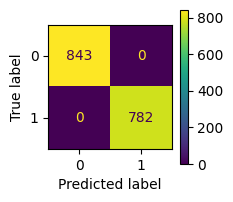

In [37]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_c_pred, ax=ax)
plt.show()

In [38]:
rf = RandomForestClassifier(max_features='sqrt', random_state=42)
param_grid = {
    'n_estimators':[10,50,100,200,300,400,500,750,900,1000],
    'max_depth':[1,2,3,5,7,10,20,25,50,100]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', n_jobs=-1)
gs.fit(X_train_c, y_train)
print(gs.best_params_)
best_rf_c = gs.best_estimator_

{'max_depth': 7, 'n_estimators': 300}


In [39]:
print("Accuracy:",accuracy_score(y_test, best_rf_c.predict(X_test_c)))
print(classification_report(y_test, best_rf_c.predict(X_test_c)))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [40]:
display(pd.DataFrame({'feature':X_most_corr.columns, 'importance':best_rf_c.feature_importances_}).sort_values(by='importance', ascending=False))

,feature,importance
0,gill-size,0.160149
11,spore-print-color,0.143241
1,gill-color,0.139280
7,population,0.094002
3,ring-type,0.084835
4,gill-spacing,0.078764
5,stalk-surface-above-ring,0.078500
2,bruises,0.072347
6,stalk-surface-below-ring,0.067748
8,habitat,0.049607


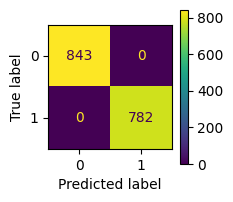

In [41]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rf_c.predict(X_test_c), ax=ax)
plt.show()

* It takes at least 12 highly correlated features to give 100% accuracy in classification.

### PCA - 12 PCs

In [42]:
pca = PCA(n_components=12)
X_12d = pca.fit_transform(X)
X_train_12d, X_test_12d, _, _ = train_test_split(X_12d, y, test_size=0.2, random_state=42)
rf_pca = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_pca.fit(X_train_12d, y_train)

RandomForestClassifier(random_state=42)

In [43]:
rf_pca_pred = rf_pca.predict(X_test_12d)
print("Accuracy of Random Forest after PCA (12D):", accuracy_score(y_test, rf_pca_pred))

Accuracy of Random Forest after PCA (12D): 0.9963076923076923


In [44]:
print("Performance Metrics for Random Forest after PCA-\n")
print(classification_report(y_test, rf_pca_pred))

Performance Metrics for Random Forest after PCA-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



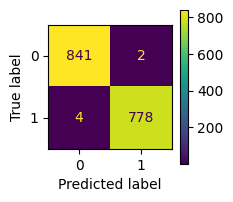

In [45]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_pca_pred, ax=ax)
plt.show()

In [46]:
rf = RandomForestClassifier(max_features='sqrt', random_state=42)
param_grid = {
    'n_estimators':[10,50,100,200,300,400,500,750,900,1000],
    'max_depth':[1,2,3,5,7,10,20,25,50,100]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', n_jobs=-1)
gs.fit(X_train_12d, y_train)
print(gs.best_params_)
best_rf_pca = gs.best_estimator_

{'max_depth': 25, 'n_estimators': 500}


In [47]:
print("Accuracy:",accuracy_score(y_test, best_rf_pca.predict(X_test_12d)))
print(classification_report(y_test, best_rf_pca.predict(X_test_12d)))

Accuracy: 0.9981538461538462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



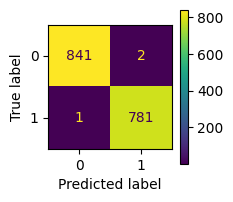

In [48]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rf_pca.predict(X_test_12d), ax=ax)
plt.show()

* While at least 12 most correlated features were able to predict the target classes with 100% accuracy, 12 PCs are not sufficient in classifying accurately.

### PCA - All PCs

In [49]:
for i in range(1,21):
    pca = PCA(n_components=i)
    X_d = pca.fit_transform(X)
    X_train_d, X_test_d, _, _ = train_test_split(X_d, y, test_size=0.2, random_state=42)
    rf_pca = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
    rf_pca.fit(X_train_d, y_train)
    rf_pca_pred = rf_pca.predict(X_test_d)
    print(f"Accuracy of Random Forest after PCA - {i}D:", accuracy_score(y_test, rf_pca_pred))

Accuracy of Random Forest after PCA - 1D: 0.656
Accuracy of Random Forest after PCA - 2D: 0.9686153846153847
Accuracy of Random Forest after PCA - 3D: 0.9895384615384616
Accuracy of Random Forest after PCA - 4D: 0.9901538461538462
Accuracy of Random Forest after PCA - 5D: 0.9963076923076923
Accuracy of Random Forest after PCA - 6D: 0.9944615384615385
Accuracy of Random Forest after PCA - 7D: 0.9981538461538462
Accuracy of Random Forest after PCA - 8D: 0.9969230769230769
Accuracy of Random Forest after PCA - 9D: 0.9956923076923077
Accuracy of Random Forest after PCA - 10D: 0.9981538461538462
Accuracy of Random Forest after PCA - 11D: 0.9944615384615385
Accuracy of Random Forest after PCA - 12D: 0.9963076923076923
Accuracy of Random Forest after PCA - 13D: 0.9975384615384615
Accuracy of Random Forest after PCA - 14D: 1.0
Accuracy of Random Forest after PCA - 15D: 1.0
Accuracy of Random Forest after PCA - 16D: 1.0
Accuracy of Random Forest after PCA - 17D: 1.0
Accuracy of Random Forest af

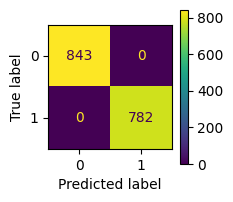

In [50]:
pca = PCA(n_components=14)
X_d = pca.fit_transform(X)
X_train_d, X_test_d, _, _ = train_test_split(X_d, y, test_size=0.2, random_state=42)
rf_pca = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_pca.fit(X_train_d, y_train)
rf_pca_pred = rf_pca.predict(X_test_d)
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_pca_pred, ax=ax)
plt.show()

#### Using the hyperparameters that gave best model for 12D data

In [51]:
for i in range(1,21):
    pca = PCA(n_components=i)
    X_d = pca.fit_transform(X)
    X_train_d, X_test_d, _, _ = train_test_split(X_d, y, test_size=0.2, random_state=42)
    rf_pca = RandomForestClassifier(n_estimators=500, max_depth=25, max_features='sqrt', random_state=42)
    rf_pca.fit(X_train_d, y_train)
    rf_pca_pred = rf_pca.predict(X_test_d)
    print(f"Accuracy of Random Forest after PCA - {i}D:", accuracy_score(y_test, rf_pca_pred))

Accuracy of Random Forest after PCA - 1D: 0.6553846153846153
Accuracy of Random Forest after PCA - 2D: 0.9673846153846154
Accuracy of Random Forest after PCA - 3D: 0.9913846153846154
Accuracy of Random Forest after PCA - 4D: 0.9883076923076923
Accuracy of Random Forest after PCA - 5D: 0.9950769230769231
Accuracy of Random Forest after PCA - 6D: 0.9950769230769231
Accuracy of Random Forest after PCA - 7D: 0.9975384615384615
Accuracy of Random Forest after PCA - 8D: 0.9975384615384615
Accuracy of Random Forest after PCA - 9D: 0.9969230769230769
Accuracy of Random Forest after PCA - 10D: 0.9981538461538462
Accuracy of Random Forest after PCA - 11D: 0.9963076923076923
Accuracy of Random Forest after PCA - 12D: 0.9981538461538462
Accuracy of Random Forest after PCA - 13D: 0.9981538461538462
Accuracy of Random Forest after PCA - 14D: 1.0
Accuracy of Random Forest after PCA - 15D: 1.0
Accuracy of Random Forest after PCA - 16D: 1.0
Accuracy of Random Forest after PCA - 17D: 1.0
Accuracy of Ran

In [57]:
pca = PCA(n_components=14)
X_14d = pca.fit_transform(X)
X_train_14d, X_test_14d, _, _ = train_test_split(X_12d, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(max_features='sqrt', random_state=42)
param_grid = {
    'n_estimators':[10,50,100,200,300,400,500,750,900,1000],
    'max_depth':[1,2,3,5,7,10,20,25,50,100]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', n_jobs=-1)
gs.fit(X_train_14d, y_train)
print(gs.best_params_)
best_rf_pca = gs.best_estimator_

{'max_depth': 25, 'n_estimators': 500}


In [58]:
print("Accuracy:",accuracy_score(y_test, best_rf_pca.predict(X_test_14d)))
print(classification_report(y_test, best_rf_pca.predict(X_test_14d)))

Accuracy: 0.9981538461538462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



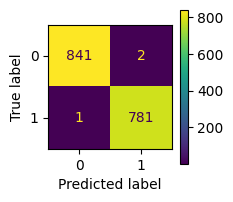

In [59]:
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay.from_predictions(y_test, best_rf_pca.predict(X_test_14d), ax=ax)
plt.show()

<ul style="color: red;"><b>
    <li>Among all variations, we can see that the best Random Forest classifiers were those that were fitted on all the features, the top 6 features based on importances given by the Random Forest classifier (after hyperparameter tuning), the 12 most correlated features, or the 14 principal components.</li>
    <li>Since PCA is not helping us get a significant dimensionality reduction whilst maintaining high accuracy and other metrics, we will not use it any further.</li>
    <li>Similarly, since we have a possibility of getting 100% accurate and precise classification with just 6 features, we will not proceed with 12 highly correlated features either.</li>
    <li>So, to see how well other classifiers work, we will use 2 datasets - one with all 20 features and another with only those top 6 features.</li></ul>

## Saving Preprocessed Datasets

In [52]:
data.to_csv('preprocessed_mushrooms.csv', index=False)

In [53]:
top_6 = feat_imp2['feature'][:6].values
top_6

array(['odor', 'gill-size', 'gill-color', 'spore-print-color',
       'population', 'stalk-surface-above-ring'], dtype=object)

In [54]:
small_data = pd.concat([data[['class']],data[top_6]],axis=1)
small_data.head()

,class,odor,gill-size,gill-color,spore-print-color,population,stalk-surface-above-ring
0,1,6,1,4,2,3,2
1,0,0,0,4,3,2,2
2,0,3,0,5,3,2,2
3,1,6,1,5,2,3,2
4,0,5,0,4,3,0,2


In [55]:
small_data.to_csv('preprocessed_smaller_mushrooms.csv', index=False)